In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

Accuracy: 0.9238847349407713
Precision: 0.9242500418971007
Recall: 0.9239403585190149
F1 Score: 0.9240951742627345
AUC-ROC: 0.923884570900896
Cross-validation Accuracy: 0.8239561080985205


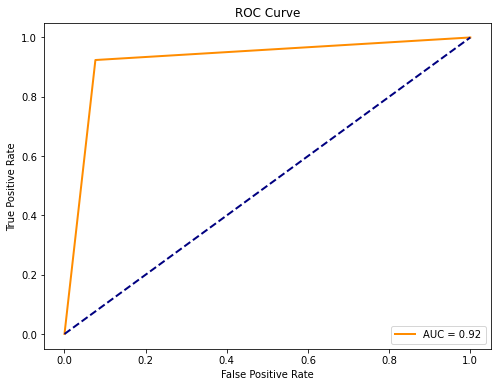

In [1]:
#Decision Tree for Undersampled Data
data= pd.read_csv("Preprocessed Data- Undersampling.csv", dtype={'Zip': str})

# Target Column: 'Is Fraud?'
X = data.drop('Is Fraud?', axis=1)  # Features
y = data['Is Fraud?']  # Target variable

# Convert non-numeric columns to numeric using Label Encoding
le = LabelEncoder()
X['Zip'] = le.fit_transform(X['Zip'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"AUC-ROC: {roc_auc}")

# Cross-validation scores
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy: {cv_scores.mean()}")

y_probs = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.9987716700988656
Precision: 0.9983718860366355
Recall: 0.9991738756976596
F1 Score: 0.9987727198727341
AUC-ROC: 0.9987714876016918


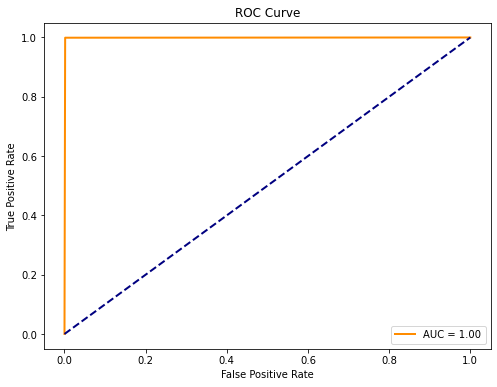

In [1]:
#Decision Tree for Smote Data

data= pd.read_csv("Preprocessed Data- Smote.csv", dtype={'Zip': str})

# Target Column: 'Is Fraud?'
X = data.drop('Is Fraud?', axis=1)  # Features
y = data['Is Fraud?']  # Target variable

# Convert non-numeric columns to numeric using Label Encoding
le = LabelEncoder()
X['Zip'] = le.fit_transform(X['Zip'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"AUC-ROC: {roc_auc}")

# Cross-validation scores
# cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
# print(f"Cross-validation Accuracy: {cv_scores.mean()}")

y_probs = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()